In [1]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

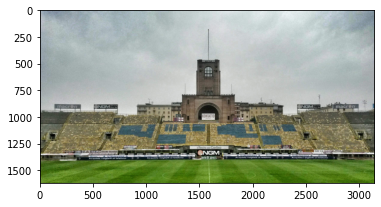

In [2]:
#Open an image in the same folder and show it
image = Image.open('img.jpeg')
plt.imshow(image)

In [3]:
#Convert image to an array and check out the shape - it is 3-dimensional.
imageArray = np.asarray(image)
imageArray.shape

(1618, 3143, 3)

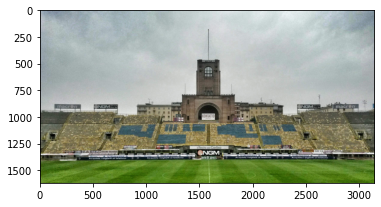

In [4]:
#Plot the array, works the same as an image even though it is just an array of numbers
plt.imshow(imageArray)

In [5]:
#View one cell in the array
#It is a list of 3 values - an RGB colour!
imageArray[0,0]

array([119, 131, 145], dtype=uint8)

In [6]:
#Slice a subset of the array
imageArray[0:100,0:100,]

array([[[119, 131, 145],
        [149, 161, 175],
        [172, 184, 198],
        ...,
        [115, 132, 148],
        [119, 136, 152],
        [127, 144, 160]],

       [[ 97, 109, 123],
        [131, 143, 157],
        [158, 170, 184],
        ...,
        [127, 144, 160],
        [124, 141, 157],
        [127, 144, 160]],

       [[140, 152, 166],
        [162, 174, 188],
        [170, 182, 196],
        ...,
        [136, 152, 168],
        [128, 144, 160],
        [129, 145, 161]],

       ...,

       [[163, 168, 174],
        [164, 169, 175],
        [176, 181, 187],
        ...,
        [141, 157, 157],
        [150, 166, 166],
        [171, 187, 187]],

       [[173, 178, 184],
        [168, 173, 179],
        [171, 176, 182],
        ...,
        [133, 149, 149],
        [133, 149, 149],
        [163, 179, 179]],

       [[188, 193, 199],
        [175, 180, 186],
        [169, 174, 180],
        ...,
        [142, 158, 158],
        [136, 152, 152],
        [158, 174, 174]]

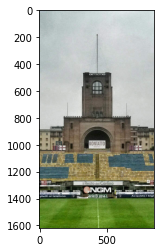

In [7]:
#Plot a subsection of the array
plt.imshow(imageArray[:,1150:2000,])

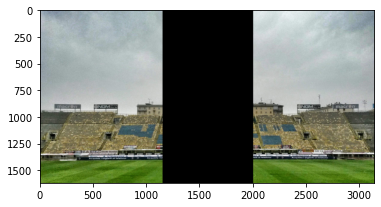

In [8]:
#Create a copy of the image
#Change the subsection of the array to [0,0,0] - black in RGB
imageArrayCopy = imageArray.copy()
imageArrayCopy[:,1150:2000] = [0,0,0]
plt.imshow(imageArrayCopy)

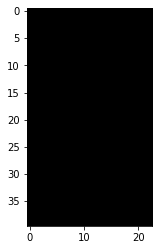

In [9]:
#Create a new 3d array, filled with zeros
#The image is only 40 pixels y, 23 pixels x
playerImage = np.zeros((40,23,3), dtype=np.uint8)
plt.imshow(playerImage)

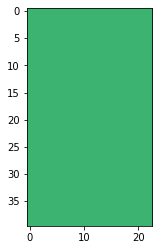

In [10]:
#Set a background colour and overwrite all values in the 3d array
bg = [60,179,113]

for i in range(0,40):
    for j in range(0,23):
        playerImage[i,j] = bg

plt.imshow(playerImage)

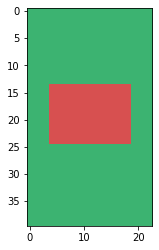

In [11]:
#Plot the silhouette for a shirt

for i in range(14,25):
        for j in range(4,19):
            playerImage[i,j] = [215,80,80]

plt.imshow(playerImage)

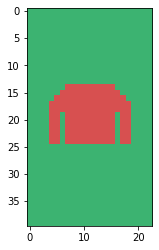

In [12]:
#Plot the arm and shoulder gaps with the background colour

#Arm gaps
for i in range(19,25):
    playerImage[i][6] = bg

for i in range(19,25):
    playerImage[i][16] = bg
    

#Shoulder gaps

shoulders = [[14,4],[14,5],[14,6],
        [15,4],[15,5],
        [16,4],
        [14,16],[14,17],[14,18],
        [15,17],[15,18],
        [16,18]]

for each in shoulders:
    playerImage[each[0],[each[1]]] = bg

plt.imshow(playerImage)

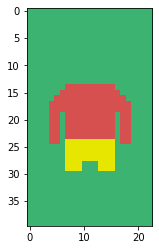

In [13]:
#Create the silhouette and gaps for the shorts

for i in range(24,30):
        for j in range(7,16):
            playerImage[i,j] = [230,230,0]
            
for i in range(28,30):
    for j in range(10,13):
        playerImage[i][j] = bg

plt.imshow(playerImage)

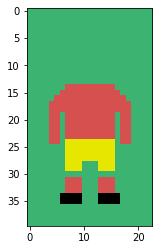

In [14]:
#A couple more features

#Socks
for i in range(31,34):
    for j in range(7,10):
        playerImage[i,j] = [215,80,80]
    
for i in range(31,34):
    for j in range(13,16):
        playerImage[i,j] = [215,80,80]

#Boots
for i in range(34,36):
    for j in range(6,10):
        playerImage[i,j] = [0,0,0]

for i in range(34,36):
    for j in range(13,17):
        playerImage[i,j] = [0,0,0]

plt.imshow(playerImage)

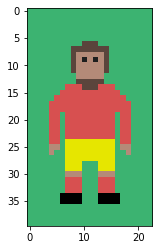

In [15]:
#Add skin tones

tone = [180,138,120]
#Create a darker colour by halving each number in the array
#A darker colour relative to the intiial colour gives some depth to the image
tone2 = [element * .5 for element in tone]

hands = [[25,4],[25,5],[26,4],
        [25,17],[25,18],[26,18]]

for hand in hands:
    playerImage[hand[0],hand[1]] = tone

knees = [7,8,9,13,14,15]

for knee in knees:
    playerImage[30,knee] = tone

for i in range(8,13):
    for j in range(9,14):
        playerImage[i,j] = tone

#Darker colour for some shadow and features

for i in range(10,13):
    playerImage[6,i] = tone2

for i in range(9,14):
    playerImage[7,i] = tone2
    playerImage[13,i] = tone2

for i in range(7,12):
    playerImage[i,8] = tone2
    playerImage[i,14] = tone2

for i in range(10,13):
    playerImage[14,i] = tone2

#Face features
eyes = [[9,10], [9,12]]

for eye in eyes:
    playerImage[eye[0],eye[1]] = [30,30,30]


plt.imshow(playerImage)

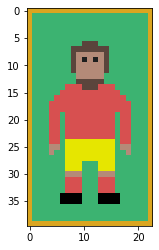

In [16]:
#Add a border
borderColor = [218,165,32]
    
playerImage[0][:] = borderColor
playerImage[-1][:] = borderColor

for i in range(0, 40):
    playerImage[i][0] = borderColor
    playerImage[i][-1] = borderColor

plt.imshow(playerImage)

In [17]:
#Wrap the above into a function
#Background, shirt & shorts colour must be selected

def createPlayer(background, shirt, shorts):
    
    playerImage = np.zeros( (40,23,3), dtype=np.uint8 )

    for i in range(0,40):
        for j in range(0,23):
            playerImage[i,j] = background


    for i in range(14,25):
        for j in range(4,19):
            playerImage[i,j] = shirt

    #Arm gaps
    for i in range(19,25):
        playerImage[i][6] = background

    for i in range(19,25):
        playerImage[i][16] = background
        

    #Shoulder gaps

    shoulders = [[14,4],[14,5],[14,6],
            [15,4],[15,5],
            [16,4],
            [14,16],[14,17],[14,18],
            [15,17],[15,18],
            [16,18]]

    for each in shoulders:
        playerImage[each[0],[each[1]]] = background

    for i in range(24,30):
        for j in range(7,16):
            playerImage[i,j] = shorts
            
    for i in range(28,30):
        for j in range(10,13):
            playerImage[i][j] = background

    #Socks
    for i in range(31,34):
        for j in range(7,10):
            playerImage[i,j] = shirt
        
    for i in range(31,34):
        for j in range(13,16):
            playerImage[i,j] = shirt

    #Boots
    for i in range(34,36):
        for j in range(6,10):
            playerImage[i,j] = [0,0,0]

    for i in range(34,36):
        for j in range(13,17):
            playerImage[i,j] = [0,0,0]

    tone = [180,138,120]
    tone2 = [element * .5 for element in tone]

    hands = [[25,4],[25,5],[26,4],
            [25,17],[25,18],[26,18]]

    for hand in hands:
        playerImage[hand[0],hand[1]] = tone

    knees = [7,8,9,13,14,15]

    for knee in knees:
        playerImage[30,knee] = tone

    for i in range(8,13):
        for j in range(9,14):
            playerImage[i,j] = tone

    ##Darker colour

    for i in range(10,13):
        playerImage[6,i] = tone2

    for i in range(9,14):
        playerImage[7,i] = tone2
        playerImage[13,i] = tone2

    for i in range(7,12):
        playerImage[i,8] = tone2
        playerImage[i,14] = tone2

    for i in range(10,13):
        playerImage[14,i] = tone2

    #Face features
    eyes = [[9,10], [9,12]]

    for eye in eyes:
        playerImage[eye[0],eye[1]] = [30,30,30]

    borderColor = [218,165,32]
    
    playerImage[0][:] = borderColor
    playerImage[-1][:] = borderColor

    for i in range(0, 40):
        playerImage[i][0] = borderColor
        playerImage[i][-1] = borderColor

    #Create an image from the array data, resize it and return it
    img = Image.fromarray(playerImage)
    img = img.resize(size=(240, 400))
    return img



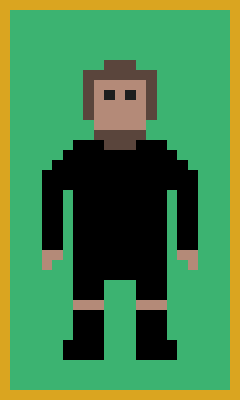

In [18]:
#Test function with black kit and green background

newPlayer = createPlayer([60,179,113],[0,0,0],[0,0,0])
newPlayer

In [19]:
#Returns random colour
def randomColour():
    return list(np.random.choice(range(256), size=3))

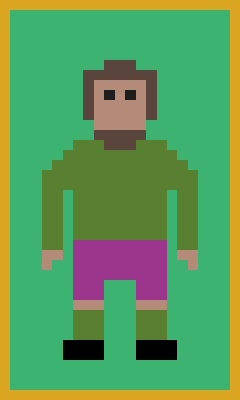

In [20]:
#Create player with random colour for shirt and shorts
createPlayer([60,179,113],randomColour(),randomColour())